## Resumo aula 2 de Machine Learning 2 ##

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, KFold, StratifiedKFold, cross_validate, train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error, recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,precision_score,accuracy_score
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.datasets._samples_generator import make_circles, make_moons

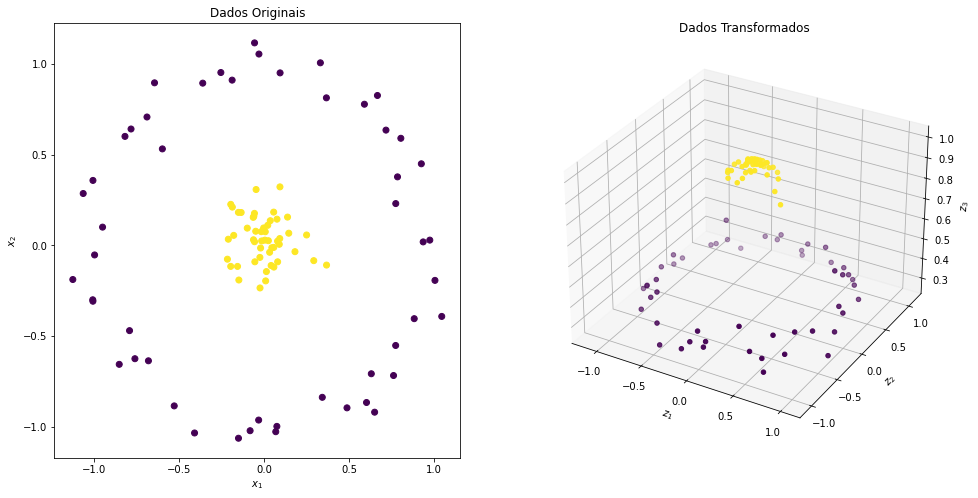

In [11]:
# definindo a função de mapeamento
def feature_map_2(X):  
    return np.asarray((X[:,0], X[:,1], np.exp( -( X[:,0]**2 + X[:,1]**2)))).T
    
X, y = make_circles(100, factor=.1, noise=.1)
Z = feature_map_2(X)

#2D scatter plot
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], c = y, cmap = 'viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Dados Originais')

#3D scatter plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Z[:,0],Z[:,1], Z[:,2],c = y, cmap = 'viridis' )
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Dados Transformados')

plt.show()

Sabendo que a classe do scikit-learn que implementa a regressão com SVM é a SVR, implemente um modelo de regressão para o dataset Steel_industry_data e faça as seguintes análises:

Elimine as seguintes colunas: Date, WeekStatus e Day_of_week

Sua variável-alvo é a coluna: Usage_kWh

Checar dados nulos. Se houver, eliminá-los

Separe 30 % dos dados para teste

Use o Random Search para selecionar os hiperparâmetros (Cuidado com o número de hiperparâmetros pois o conjunto de dados é grande)

Use um objeto KFold para validação cruzada (use 5 folds)

As métricas de seleção podem ser o  R2  ou o MAE

Utilize o modelo do Pipeline

Não se esqueça de aplicar o escalonamento dos dados (StandardScaler)

In [12]:
steel = pd.read_csv('Steel_industry_data.csv')

X = steel.select_dtypes('number')
X = X.drop(columns='Usage_kWh')
y = steel['Usage_kWh']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

steps = [('std_scaler', StandardScaler()),
        ('svm', SVR())]

kf5 = KFold(n_splits=3, shuffle=True)

hyp_dict = {'svm__kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'svm__C': np.linspace(0.1, 10, 100),
            'svm__gamma': np.linspace(0.1, 10, 100),
            'svm__degree':[2,3]
            }

pipe = Pipeline(steps=steps)

model = RandomizedSearchCV(estimator=pipe, n_jobs=-1 ,param_distributions=hyp_dict,scoring=['r2','neg_mean_squared_error'], n_iter=5, cv=kf5, refit=False)

model.fit(X_train,y_train)


In [ ]:
model.best_params_

{'svm__kernel': 'rbf',
 'svm__gamma': 3.0000000000000004,
 'svm__degree': 3,
 'svm__C': 6.2}

In [ ]:
model.best_score_

0.9898909354392836